# What Is Encoding ?

![](https://learnlearn.uk/alevelcs/wp-content/uploads/sites/20/2020/09/binary.png)

- Encoding refers to the process of converting data from one representation or format to another. In the context of data analysis and machine learning, encoding is often used to transform categorical variables into a numerical format that can be understood and processed by algorithms.

- Categorical variables contain distinct categories or groups, such as colors (red, green, blue) or education levels (high school, college, graduate). Machine learning algorithms typically work with numerical data, so categorical variables need to be encoded into numerical representations.

- There are different types of encoding techniques, such as one-hot encoding, label encoding, and ordinal encoding. One-hot encoding represents each category as a binary feature, label encoding assigns a unique integer to each category, and ordinal encoding assigns integers based on the order or rank of the categories.

- The choice of encoding technique depends on the nature of the data and the requirements of the machine learning algorithm. Proper encoding ensures that categorical variables can be effectively utilized in the model training process.

# Label Encoding & Binary Encoding

![](https://www.statology.org/wp-content/uploads/2022/08/labelencode2-1.jpg)

- Label Encoding is a data encoding technique used to convert categorical variables into numerical form. In label encoding, each unique category or label is assigned a unique integer value. This encoding is commonly used when the categories have an inherent ordinal relationship or when the algorithm can interpret the encoded values as meaningful.

- **The process of label encoding involves the following steps:**

1. Identify the categorical variable to be encoded.
2. Assign a numerical label or integer value to each unique category.
3. Replace the categorical values in the dataset with their corresponding numerical labels.

- For example, consider a dataset with a "Color" variable that contains categories such as "Red," "Green," and "Blue." After label encoding, the dataset may have numerical labels like 0 for "Red," 1 for "Green," and 2 for "Blue."

- Label encoding is a simple and straightforward encoding technique, but it has some limitations. Since the encoded values are numeric, algorithms may interpret them as having an inherent order or magnitude, even when there is no meaningful relationship between the categories. In such cases, one-hot encoding or other encoding techniques may be more appropriate.

- It's important to note that label encoding should be applied to the categorical variables in the training set only and not to the target variable when performing supervised learning tasks.

In [1]:
# import Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor # => Imported for multivariate outlier detection method.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Titanic Dataset

In [3]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [4]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_titanic)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 

In [5]:
# Analysis of Categorical Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car 

In [6]:
# Assigning the lists returned from the grap_col_names function to variables.

cat_cols, num_cols, cat_but_car = grab_col_names(df_titanic)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [7]:
# Creating a Label Encoder Object 

le = LabelEncoder()

In [8]:
# Label Encoding Transformation

le.fit_transform(df_titanic["Sex"])[0:5]

array([1, 0, 0, 0, 1])

In [9]:
# Inverse Transformation

le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [10]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [11]:
# Label Encoding Function for Binary Variables

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [12]:
# Identifying Binary Variables for Label Encoding

binary_cols = [col for col in df_titanic.columns if df_titanic[col].dtype not in [int, float]
               and df_titanic[col].nunique() == 2]

In [13]:
# Label Encoding Binary Variables in DataFrame

for col in binary_cols:
    label_encoder(df_titanic, col)

In [14]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


* **Very Important Note: Before encoding, missing observations in the data set should be either removed from the data set or filled. If we are going to perform encoding without doing these two operations, we should remember that the missing observations are encoded.**

# Application_Train Dataset

In [15]:
# Loading the Data Set

df_application_train = pd.read_csv('/kaggle/input/application-train/application_train.csv')

In [16]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_application_train)

##################### Shape #####################
(307511, 122)
##################### Types #####################
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_M

In [17]:
# Analysis of Categorical Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car 

In [18]:
# Assigning the lists returned from the grap_col_names function to variables.

cat_cols, num_cols, cat_but_car = grab_col_names(df_application_train)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [19]:
# Identifying Binary Variables for Label Encoding

binary_cols = [col for col in df_application_train.columns if df_application_train[col].dtype not in [int, float]
               and df_application_train[col].nunique() == 2]

In [20]:
binary_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [21]:
# Label Encoding Binary Variables in DataFrame

for col in binary_cols:
    label_encoder(df_application_train, col)

In [22]:
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",0,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,0,F,0,0,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,0,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,1,M,1,1,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# One-Hot Encoding

- One-Hot Encoding is a technique used to convert categorical variables into a binary vector representation. It creates new binary columns for each unique category in the variable, where a value of 1 represents the presence of that category and 0 represents its absence. This encoding is useful when the categorical variable does not have an inherent order or hierarchy.

![](https://datagy.io/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

In [23]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [24]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_titanic)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 

In [25]:
# Analysis of Categorical Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car 

In [26]:
# Assigning the lists returned from the grap_col_names function to variables.

cat_cols, num_cols, cat_but_car = grab_col_names(df_titanic)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [27]:
# One-Hot Encoding Categorical Variable 'Embarked' in DataFrame

pd.get_dummies(df_titanic, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1


In [28]:
# One-Hot Encoding Categorical Variable 'Embarked' with Drop First in DataFrame

pd.get_dummies(df_titanic, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


In [29]:
# One-Hot Encoding Categorical Variable 'Embarked' with NaN as a Separate Category in DataFrame

pd.get_dummies(df_titanic, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1,0


In [30]:
# One-Hot Encoding Categorical Variables 'Sex' and 'Embarked' with Dropping First Category in DataFrame

pd.get_dummies(df_titanic, columns=["Sex", "Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,1,0,1


In [31]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [32]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [33]:
# Columns eligible for One-Hot Encoding with categories between 2 and 10 unique values: ohe_cols

ohe_cols = [col for col in df_titanic.columns if 10 >= df_titanic[col].nunique() > 2]

In [34]:
ohe_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [35]:
one_hot_encoder(df_titanic, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Rare Encoding

![](https://miro.medium.com/v2/resize:fit:1400/1*TpTZiaT2HXjRibxOc98pEw.png)

- Rare Encoding is a technique used to handle infrequently occurring categories in categorical variables. It involves replacing these rare categories with a more general label or a special category to reduce the sparsity of the data and improve the performance of the model.

- **The steps involved in Rare Encoding typically include:**

1. Determine the threshold: Set a threshold frequency below which categories are considered rare.
2. Identify rare categories: Identify the categories that occur less frequently than the defined threshold.
3. Encode rare categories: Replace the rare categories with a more general label or a special category.
4. Preserve information: Optionally, create an additional category to indicate the rare categories, allowing the model to differentiate them from other categories.

- By applying Rare Encoding, we can reduce the impact of rare categories on the model's performance and prevent overfitting, especially in situations where rare categories do not provide sufficient information for accurate predictions.

- **1. Analysing the rarity of categorical variables.**
- **2. Analysing the relationship between rare categories and the dependent variable.**
- **3. We will write a Rare encoder.**

In [36]:
# Loading the Data Set

df_application_train = pd.read_csv('/kaggle/input/application-train/application_train.csv')

In [37]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_application_train)

##################### Shape #####################
(307511, 122)
##################### Types #####################
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_M

In [38]:
# Analysis of Categorical Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car 

In [39]:
# Assigning the lists returned from the grap_col_names function to variables.

cat_cols, num_cols, cat_but_car = grab_col_names(df_application_train)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [40]:
# 1. Analysing the rarity of categorical variables.

In [41]:
# Counts of unique values in the 'NAME_EDUCATION_TYPE' column of the 'df_application_train' DataFrame

df_application_train["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [42]:
# # Categorical Variable Summary for DataFrame

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   278232 90.479
Revolving loans               29279  9.521
##########################################


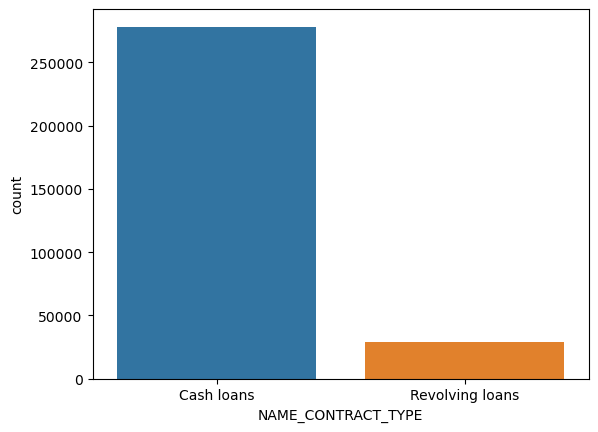

     CODE_GENDER  Ratio
F         202448 65.834
M         105059 34.164
XNA            4  0.001
##########################################


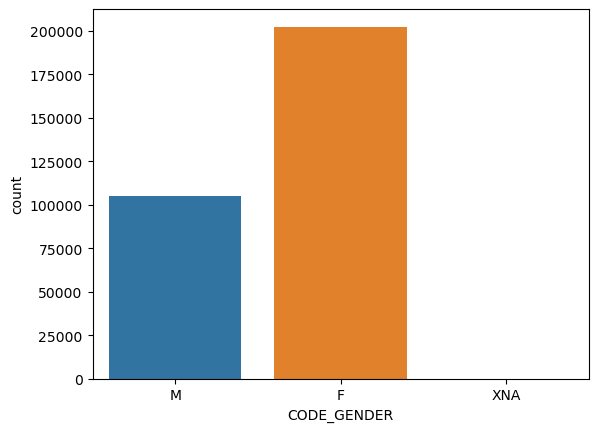

   FLAG_OWN_CAR  Ratio
N        202924 65.989
Y        104587 34.011
##########################################


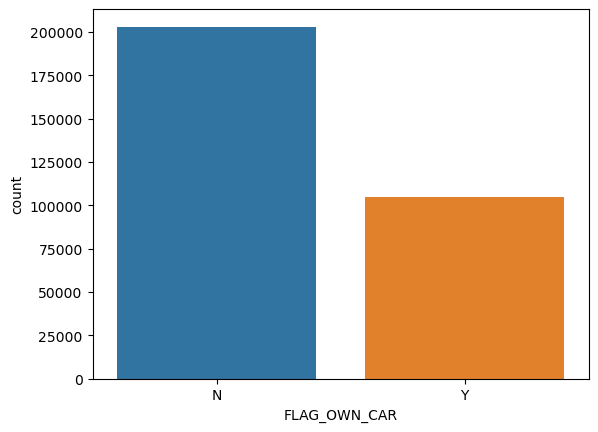

   FLAG_OWN_REALTY  Ratio
Y           213312 69.367
N            94199 30.633
##########################################


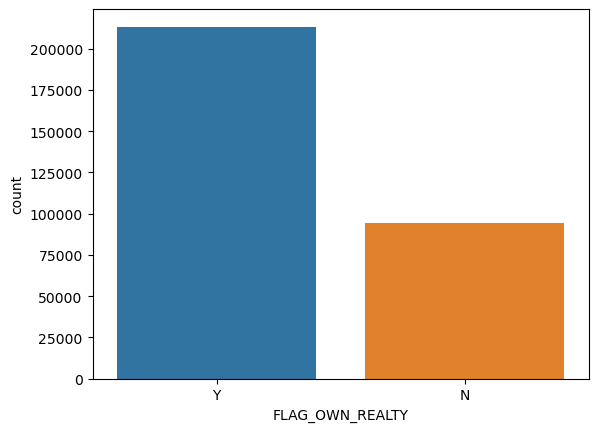

                 NAME_TYPE_SUITE  Ratio
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            11370  3.697
Children                    3267  1.062
Other_B                     1770  0.576
Other_A                      866  0.282
Group of people              271  0.088
##########################################


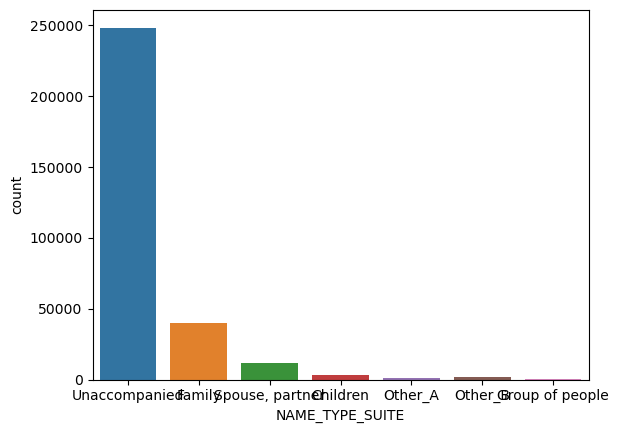

                      NAME_INCOME_TYPE  Ratio
Working                         158774 51.632
Commercial associate             71617 23.289
Pensioner                        55362 18.003
State servant                    21703  7.058
Unemployed                          22  0.007
Student                             18  0.006
Businessman                         10  0.003
Maternity leave                      5  0.002
##########################################


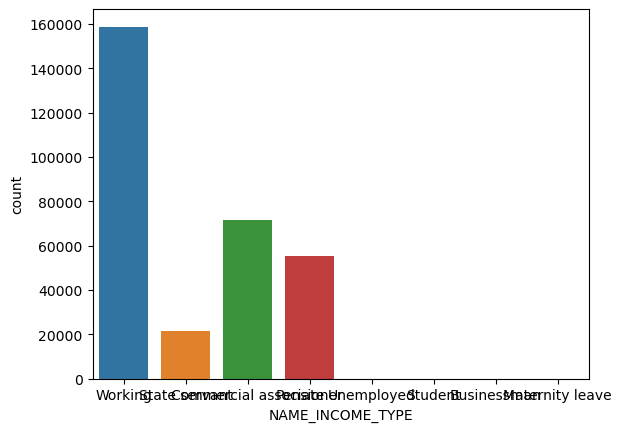

                               NAME_EDUCATION_TYPE  Ratio
Secondary / secondary special               218391 71.019
Higher education                             74863 24.345
Incomplete higher                            10277  3.342
Lower secondary                               3816  1.241
Academic degree                                164  0.053
##########################################


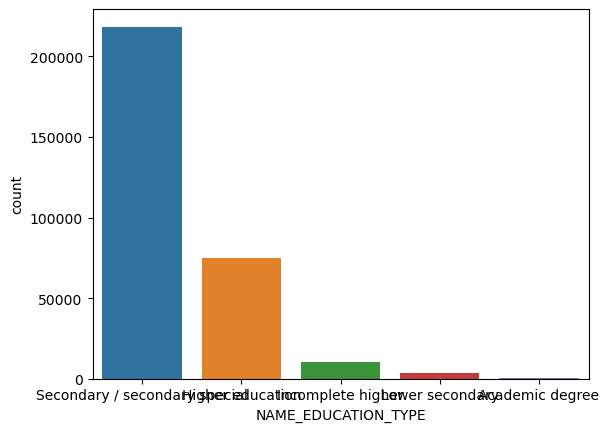

                      NAME_FAMILY_STATUS  Ratio
Married                           196432 63.878
Single / not married               45444 14.778
Civil marriage                     29775  9.683
Separated                          19770  6.429
Widow                              16088  5.232
Unknown                                2  0.001
##########################################


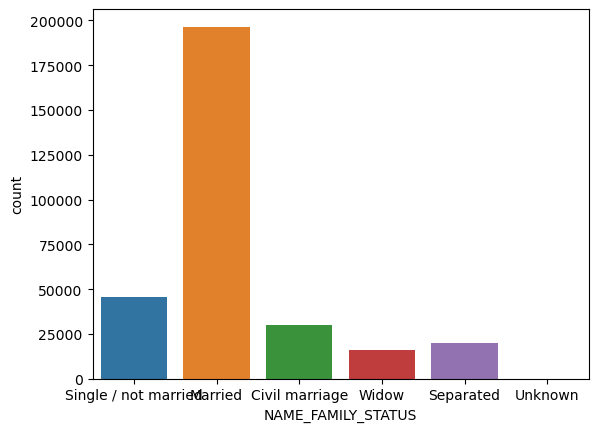

                     NAME_HOUSING_TYPE  Ratio
House / apartment               272868 88.734
With parents                     14840  4.826
Municipal apartment              11183  3.637
Rented apartment                  4881  1.587
Office apartment                  2617  0.851
Co-op apartment                   1122  0.365
##########################################


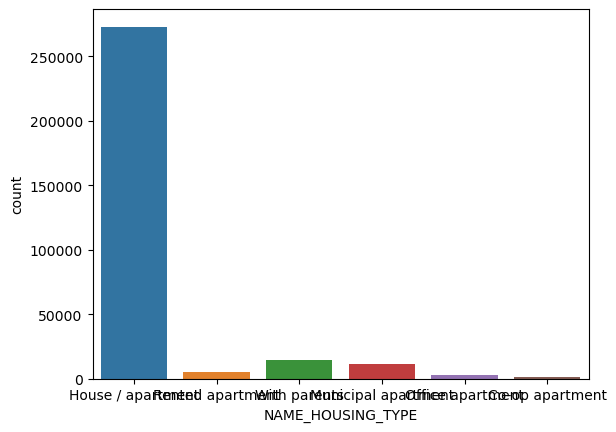

                       OCCUPATION_TYPE  Ratio
Laborers                         55186 17.946
Sales staff                      32102 10.439
Core staff                       27570  8.966
Managers                         21371  6.950
Drivers                          18603  6.050
High skill tech staff            11380  3.701
Accountants                       9813  3.191
Medicine staff                    8537  2.776
Security staff                    6721  2.186
Cooking staff                     5946  1.934
Cleaning staff                    4653  1.513
Private service staff             2652  0.862
Low-skill Laborers                2093  0.681
Waiters/barmen staff              1348  0.438
Secretaries                       1305  0.424
Realty agents                      751  0.244
HR staff                           563  0.183
IT staff                           526  0.171
##########################################


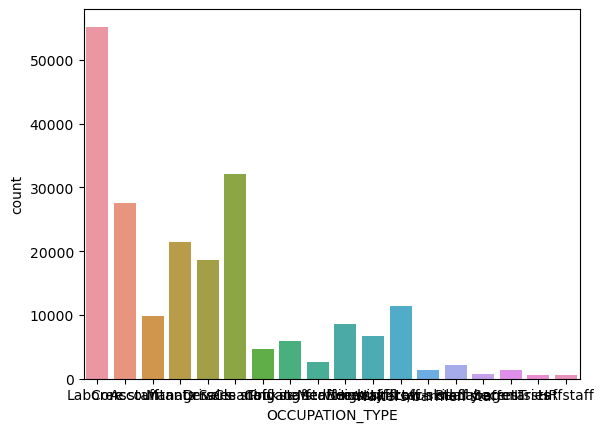

           WEEKDAY_APPR_PROCESS_START  Ratio
TUESDAY                         53901 17.528
WEDNESDAY                       51934 16.889
MONDAY                          50714 16.492
THURSDAY                        50591 16.452
FRIDAY                          50338 16.369
SATURDAY                        33852 11.008
SUNDAY                          16181  5.262
##########################################


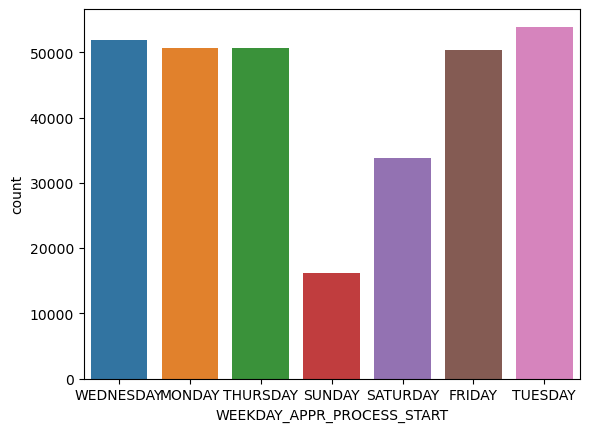

                       FONDKAPREMONT_MODE  Ratio
reg oper account                    73830 24.009
reg oper spec account               12080  3.928
not specified                        5687  1.849
org spec account                     5619  1.827
##########################################


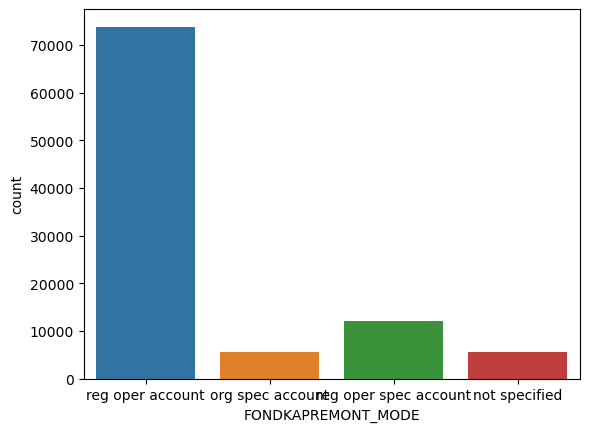

                  HOUSETYPE_MODE  Ratio
block of flats            150503 48.942
specific housing            1499  0.487
terraced house              1212  0.394
##########################################


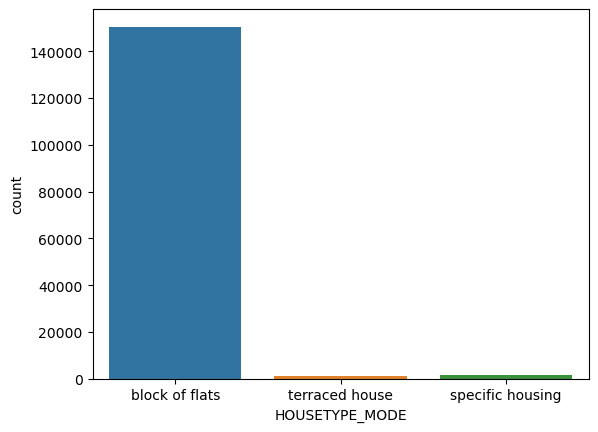

              WALLSMATERIAL_MODE  Ratio
Panel                      66040 21.476
Stone, brick               64815 21.077
Block                       9253  3.009
Wooden                      5362  1.744
Mixed                       2296  0.747
Monolithic                  1779  0.579
Others                      1625  0.528
##########################################


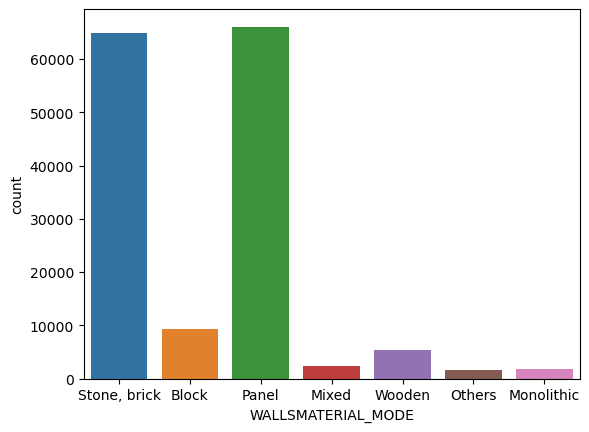

     EMERGENCYSTATE_MODE  Ratio
No                159428 51.845
Yes                 2328  0.757
##########################################


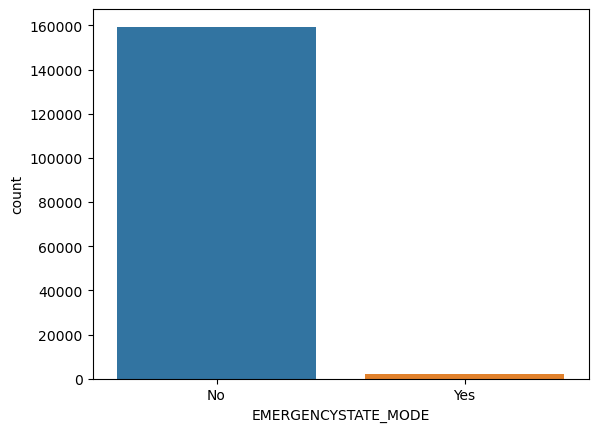

   TARGET  Ratio
0  282686 91.927
1   24825  8.073
##########################################


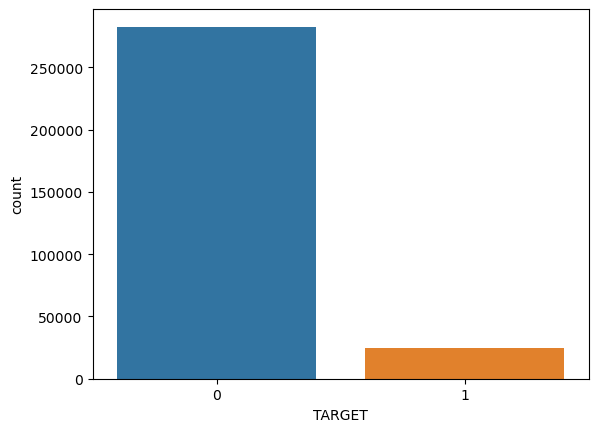

   FLAG_MOBIL   Ratio
1      307510 100.000
0           1   0.000
##########################################


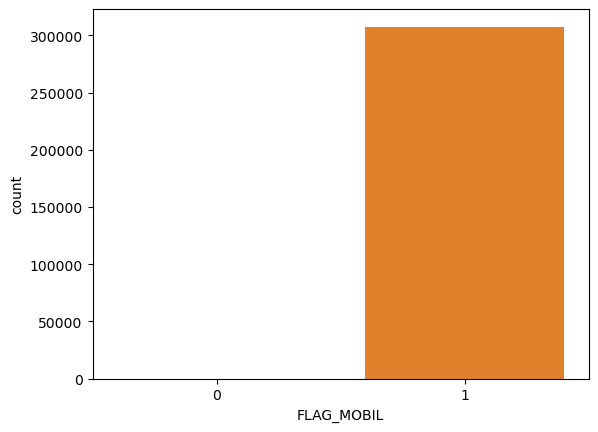

   FLAG_EMP_PHONE  Ratio
1          252125 81.989
0           55386 18.011
##########################################


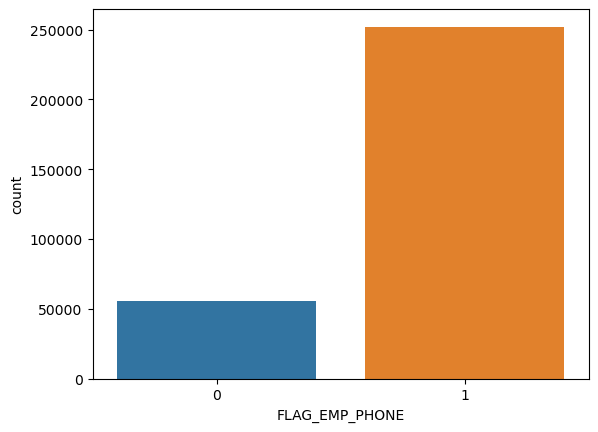

   FLAG_WORK_PHONE  Ratio
0           246203 80.063
1            61308 19.937
##########################################


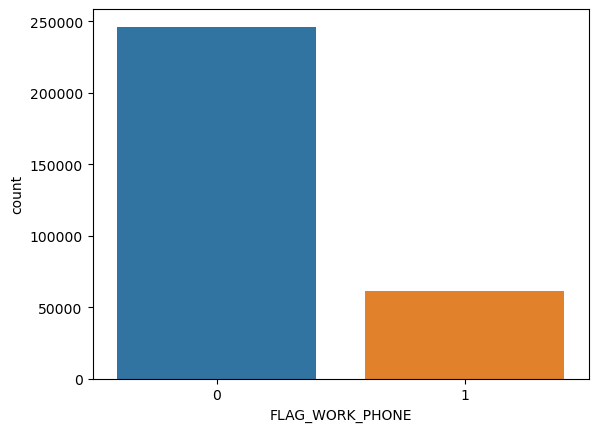

   FLAG_CONT_MOBILE  Ratio
1            306937 99.813
0               574  0.187
##########################################


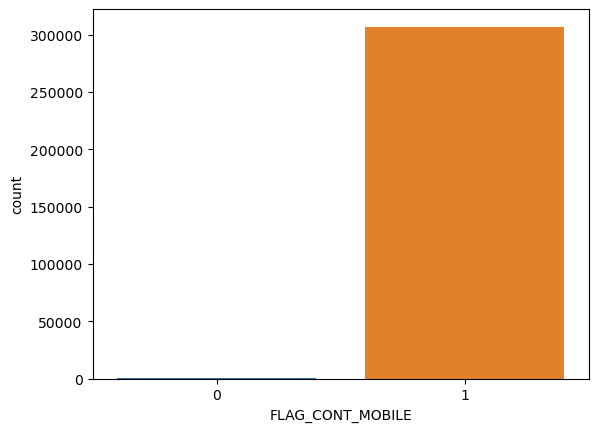

   FLAG_PHONE  Ratio
0      221080 71.893
1       86431 28.107
##########################################


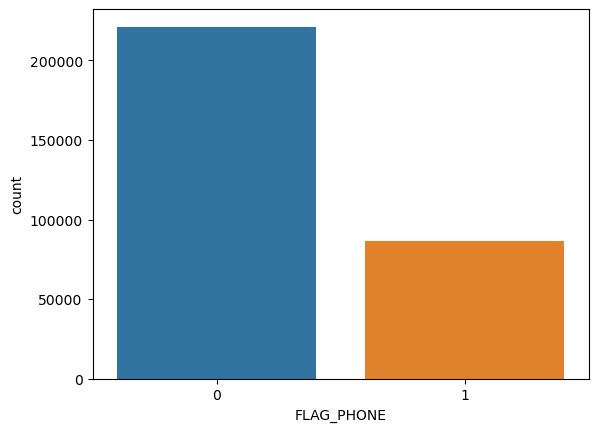

   FLAG_EMAIL  Ratio
0      290069 94.328
1       17442  5.672
##########################################


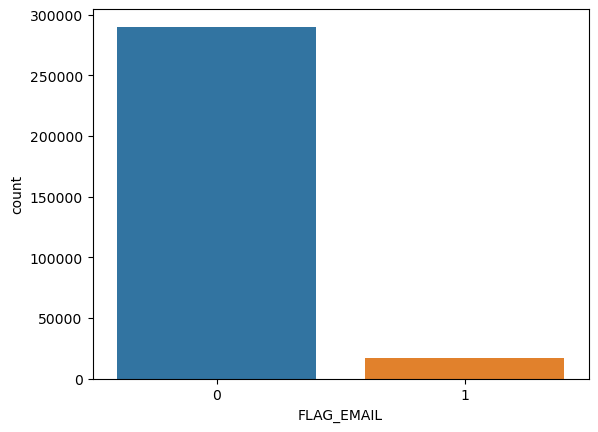

   REGION_RATING_CLIENT  Ratio
2                226984 73.813
3                 48330 15.717
1                 32197 10.470
##########################################


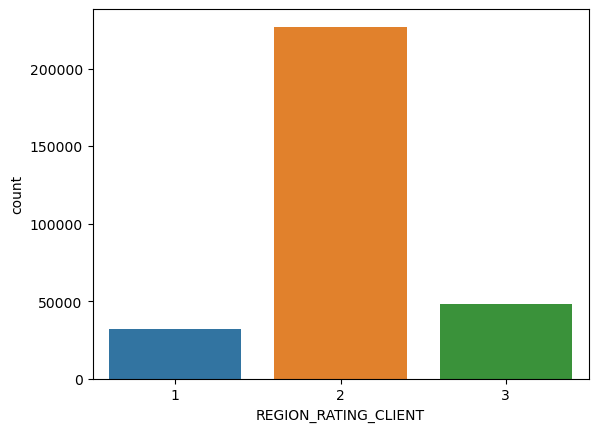

   REGION_RATING_CLIENT_W_CITY  Ratio
2                       229484 74.626
3                        43860 14.263
1                        34167 11.111
##########################################


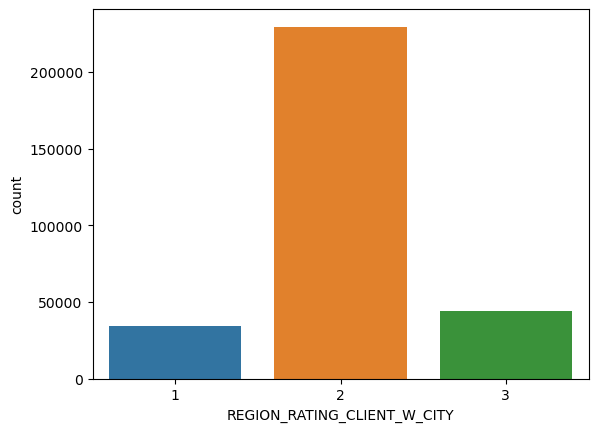

   REG_REGION_NOT_LIVE_REGION  Ratio
0                      302854 98.486
1                        4657  1.514
##########################################


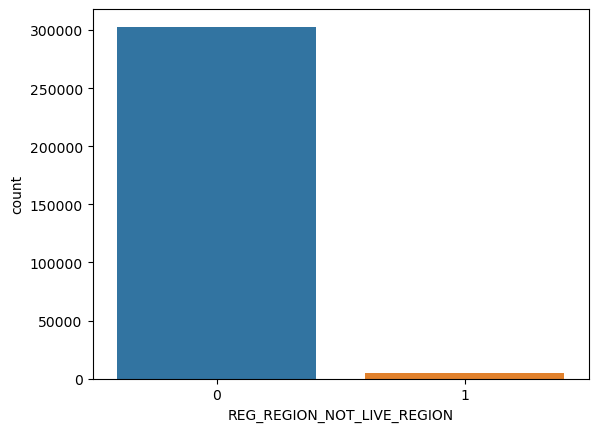

   REG_REGION_NOT_WORK_REGION  Ratio
0                      291899 94.923
1                       15612  5.077
##########################################


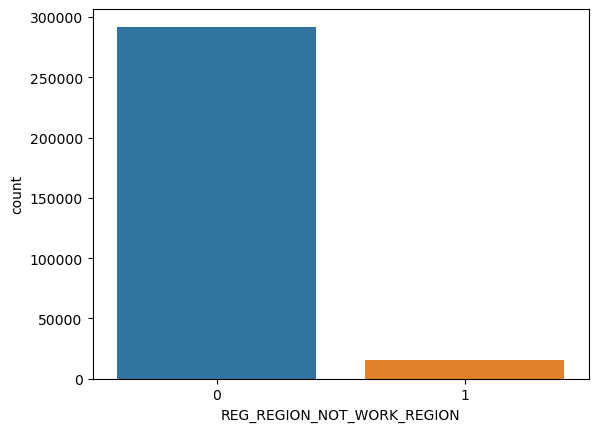

   LIVE_REGION_NOT_WORK_REGION  Ratio
0                       295008 95.934
1                        12503  4.066
##########################################


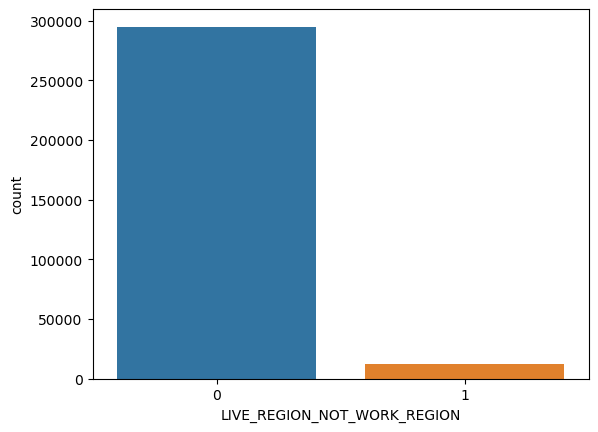

   REG_CITY_NOT_LIVE_CITY  Ratio
0                  283472 92.183
1                   24039  7.817
##########################################


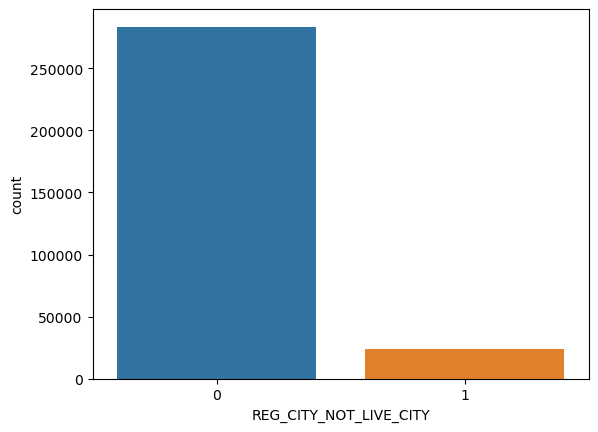

   REG_CITY_NOT_WORK_CITY  Ratio
0                  236644 76.955
1                   70867 23.045
##########################################


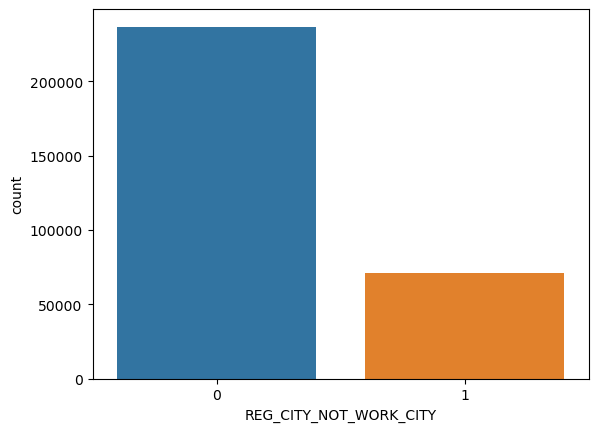

   LIVE_CITY_NOT_WORK_CITY  Ratio
0                   252296 82.045
1                    55215 17.955
##########################################


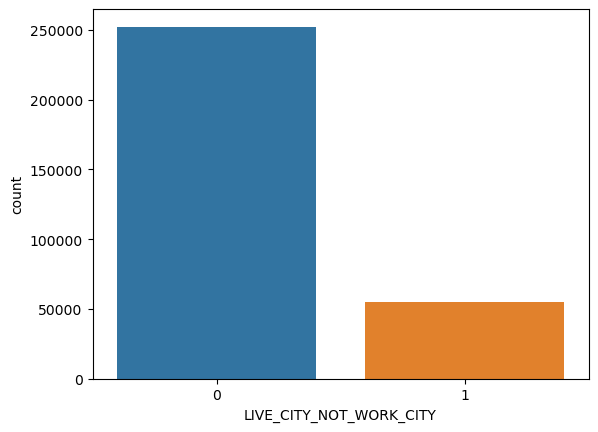

        DEF_60_CNT_SOCIAL_CIRCLE  Ratio
0.000                     280721 91.288
1.000                      21841  7.103
2.000                       3170  1.031
3.000                        598  0.194
4.000                        135  0.044
5.000                         20  0.007
6.000                          3  0.001
7.000                          1  0.000
24.000                         1  0.000
##########################################


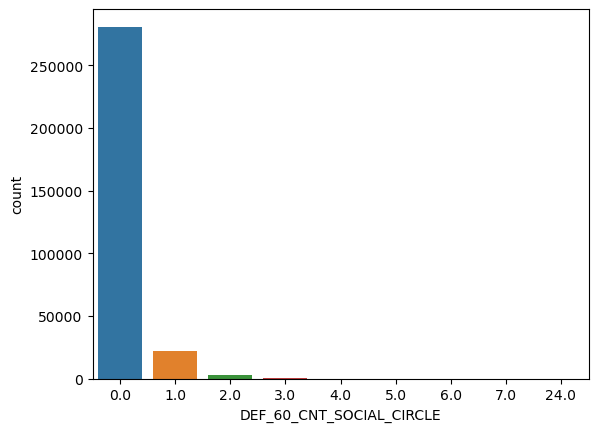

   FLAG_DOCUMENT_2  Ratio
0           307498 99.996
1               13  0.004
##########################################


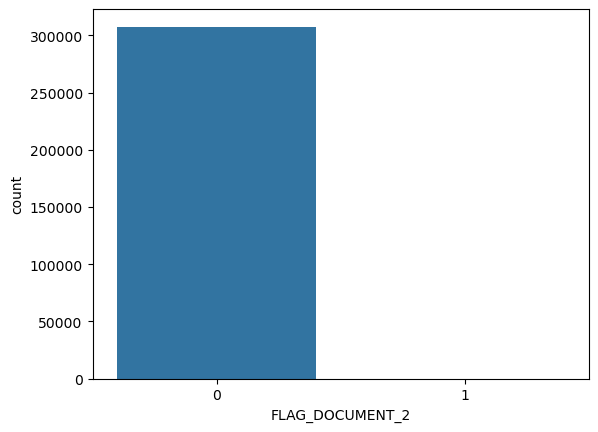

   FLAG_DOCUMENT_3  Ratio
1           218340 71.002
0            89171 28.998
##########################################


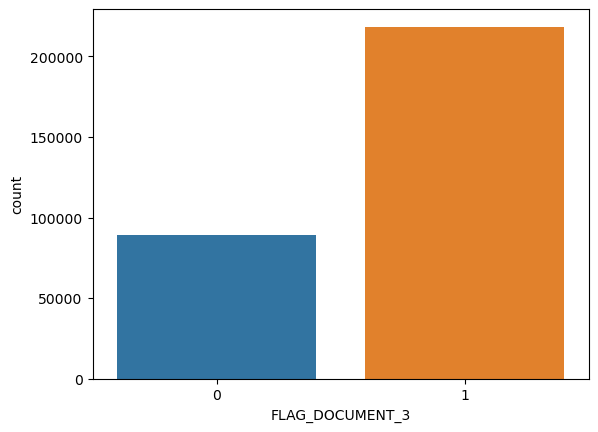

   FLAG_DOCUMENT_4  Ratio
0           307486 99.992
1               25  0.008
##########################################


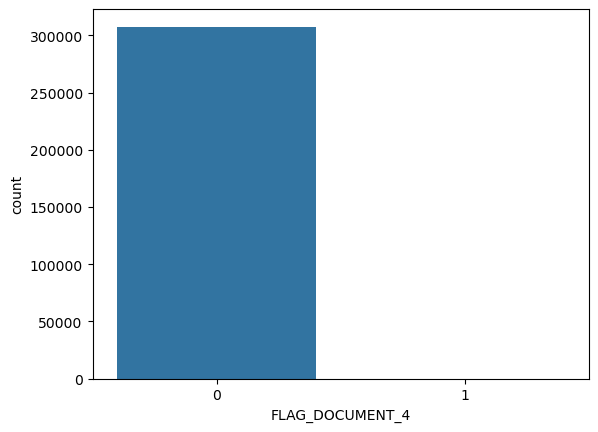

   FLAG_DOCUMENT_5  Ratio
0           302863 98.489
1             4648  1.511
##########################################


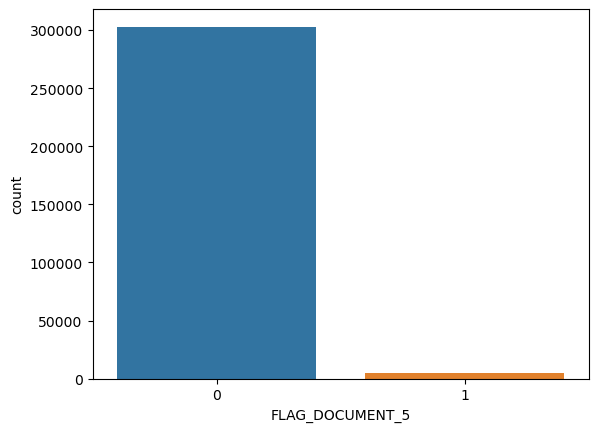

   FLAG_DOCUMENT_6  Ratio
0           280433 91.194
1            27078  8.806
##########################################


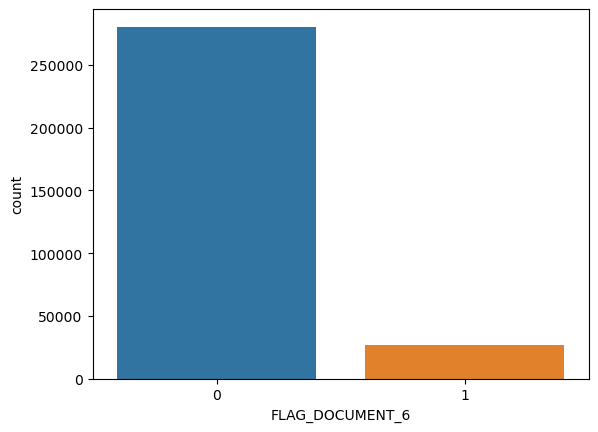

   FLAG_DOCUMENT_7  Ratio
0           307452 99.981
1               59  0.019
##########################################


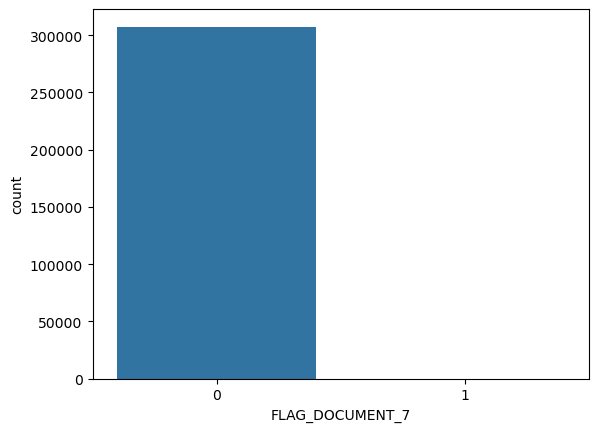

   FLAG_DOCUMENT_8  Ratio
0           282487 91.862
1            25024  8.138
##########################################


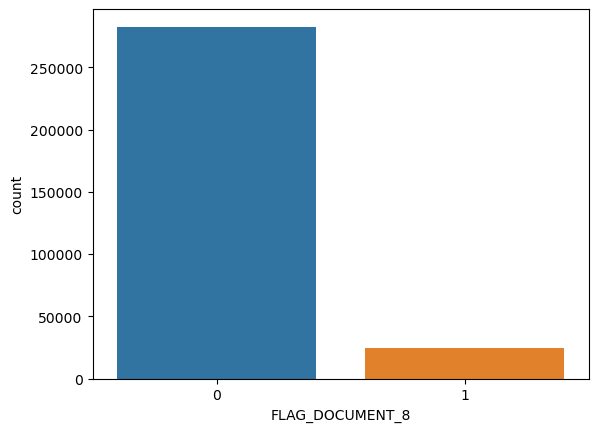

   FLAG_DOCUMENT_9  Ratio
0           306313 99.610
1             1198  0.390
##########################################


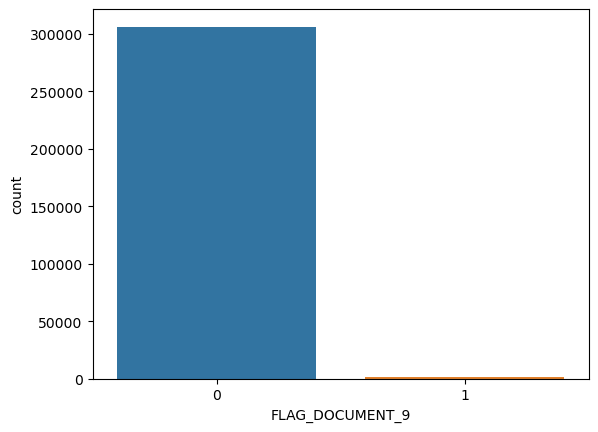

   FLAG_DOCUMENT_10  Ratio
0            307504 99.998
1                 7  0.002
##########################################


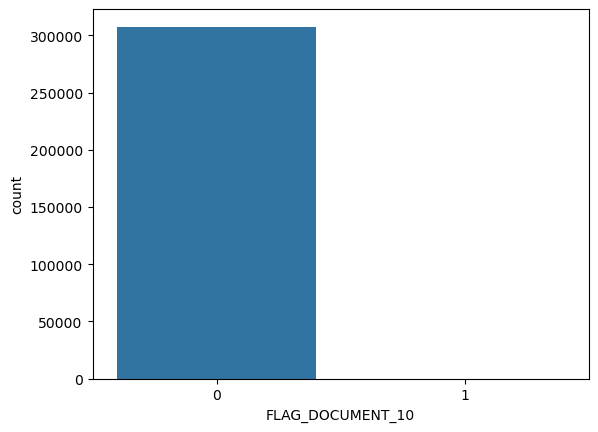

   FLAG_DOCUMENT_11  Ratio
0            306308 99.609
1              1203  0.391
##########################################


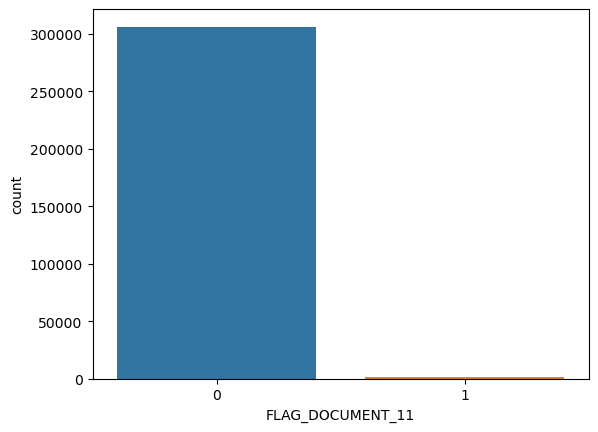

   FLAG_DOCUMENT_12  Ratio
0            307509 99.999
1                 2  0.001
##########################################


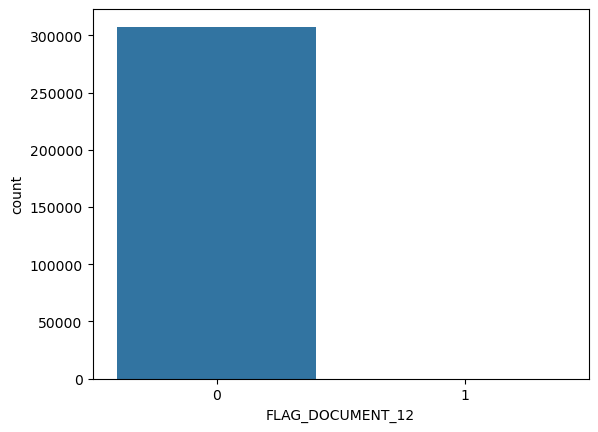

   FLAG_DOCUMENT_13  Ratio
0            306427 99.647
1              1084  0.353
##########################################


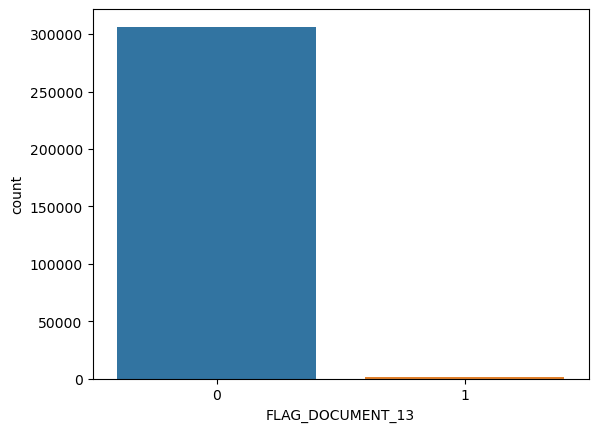

   FLAG_DOCUMENT_14  Ratio
0            306608 99.706
1               903  0.294
##########################################


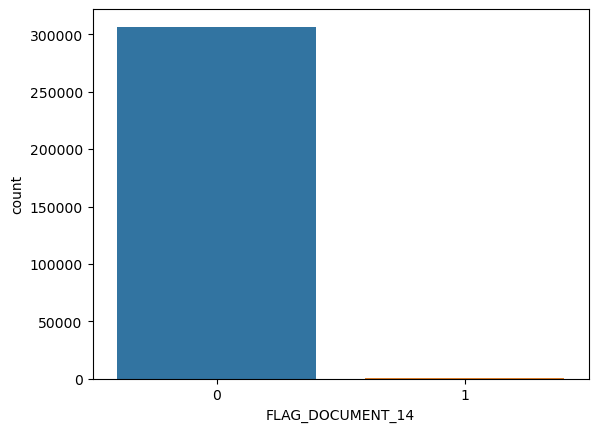

   FLAG_DOCUMENT_15  Ratio
0            307139 99.879
1               372  0.121
##########################################


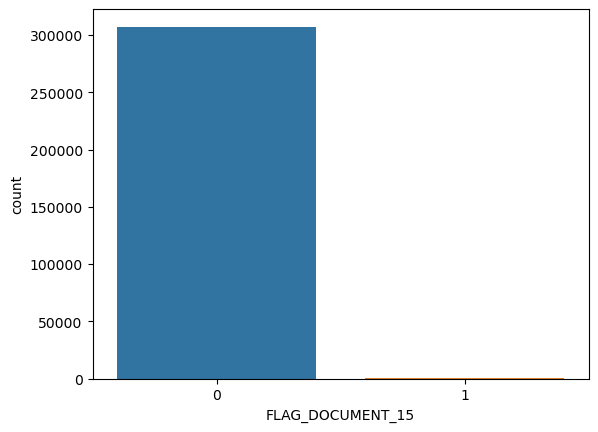

   FLAG_DOCUMENT_16  Ratio
0            304458 99.007
1              3053  0.993
##########################################


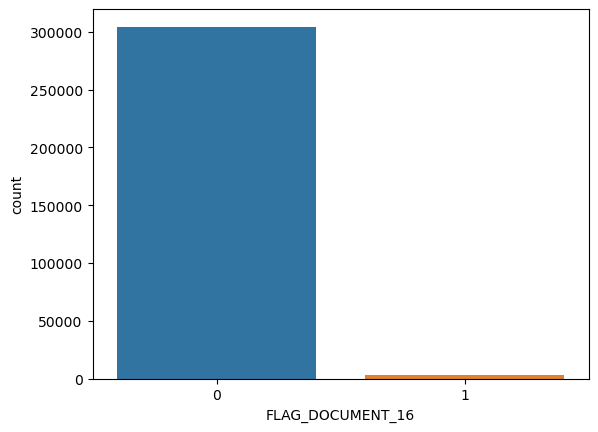

   FLAG_DOCUMENT_17  Ratio
0            307429 99.973
1                82  0.027
##########################################


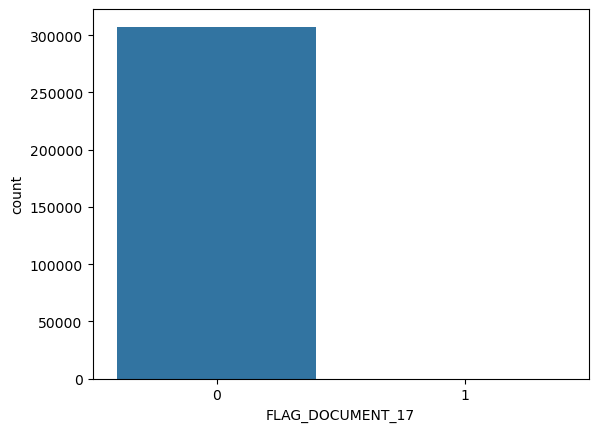

   FLAG_DOCUMENT_18  Ratio
0            305011 99.187
1              2500  0.813
##########################################


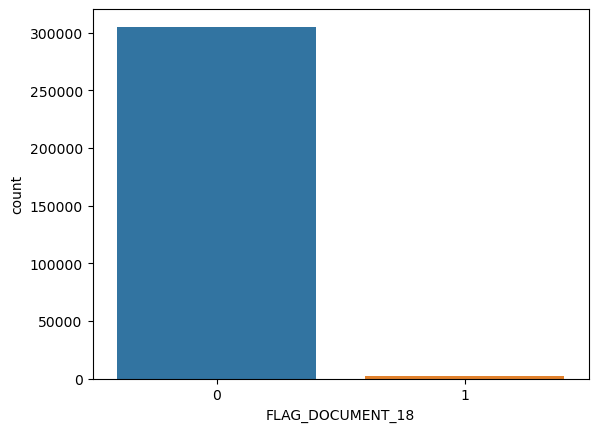

   FLAG_DOCUMENT_19  Ratio
0            307328 99.940
1               183  0.060
##########################################


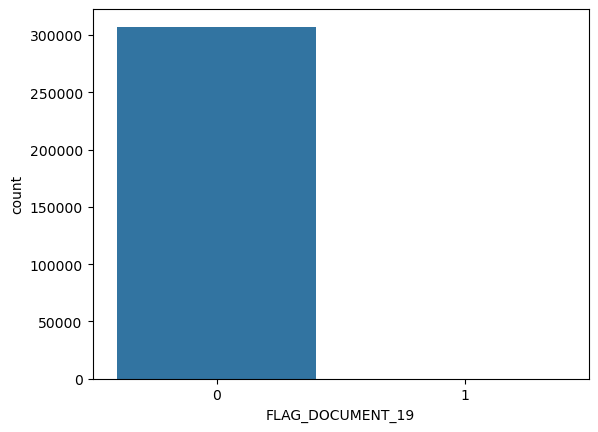

   FLAG_DOCUMENT_20  Ratio
0            307355 99.949
1               156  0.051
##########################################


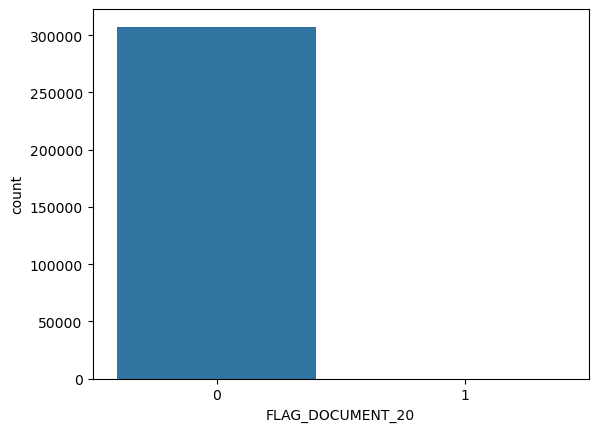

   FLAG_DOCUMENT_21  Ratio
0            307408 99.967
1               103  0.033
##########################################


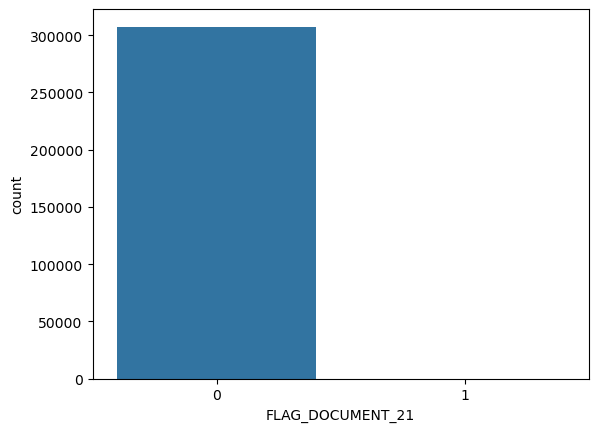

       AMT_REQ_CREDIT_BUREAU_HOUR  Ratio
0.000                      264366 85.970
1.000                        1560  0.507
2.000                          56  0.018
3.000                           9  0.003
4.000                           1  0.000
##########################################


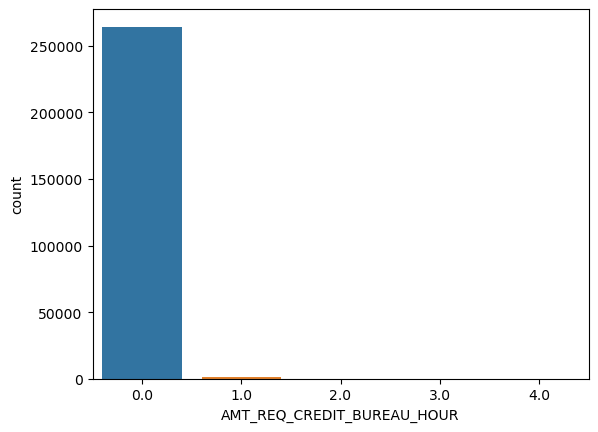

       AMT_REQ_CREDIT_BUREAU_DAY  Ratio
0.000                     264503 86.014
1.000                       1292  0.420
2.000                        106  0.034
3.000                         45  0.015
4.000                         26  0.008
5.000                          9  0.003
6.000                          8  0.003
9.000                          2  0.001
8.000                          1  0.000
##########################################


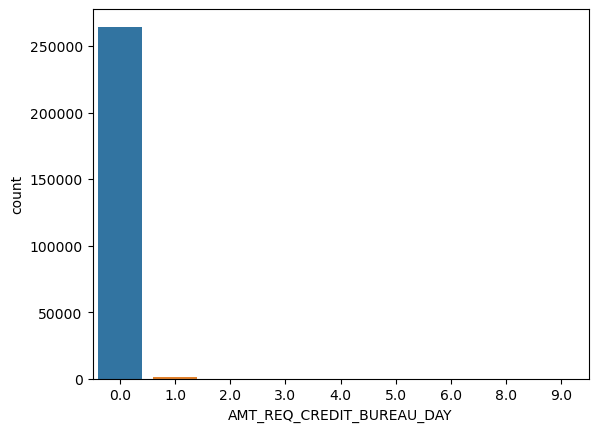

       AMT_REQ_CREDIT_BUREAU_WEEK  Ratio
0.000                      257456 83.723
1.000                        8208  2.669
2.000                         199  0.065
3.000                          58  0.019
4.000                          34  0.011
6.000                          20  0.007
5.000                          10  0.003
8.000                           5  0.002
7.000                           2  0.001
##########################################


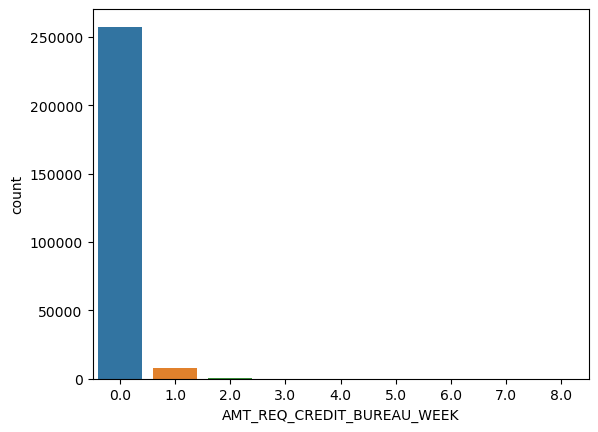

In [43]:
# Categorical Variable Summaries in df_application_train

for col in cat_cols:
    cat_summary(df_application_train, col, plot=True)

In [44]:
# 2. Analysing the relationship between rare categories and the dependent variable.

In [45]:
# Value Counts for "NAME_INCOME_TYPE" Column in df_application_train DataFrame

df_application_train["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [46]:
# Mean Target Value for Each Category in "NAME_INCOME_TYPE" Column in df_application_train DataFrame

df_application_train.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [47]:
# Function to Perform Rare Analysis on Categorical Variables in a DataFrame

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [48]:
# Call the fonction

rare_analyser(df_application_train, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
      COUNT  RATIO  TARGET_MEAN
F    202448  0.658        0.070
M    105059  0.342        0.101
XNA       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Group of people     271  0.001        0.085
Other_A             866  0.003        0.088
Other_B            1770  0.006        0.098
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 8
                       COUNT  RATIO  TARGET_MEAN
Businessman               10  0.

In [49]:
# 3. We will write a Rare encoder.

In [50]:
# Rare Encoding function for Categorical Variables 

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [51]:
# Rare Encoding Applied to DataFrame: Removing Rare Categories

new_df = rare_encoder(df_application_train, 0.01)

In [52]:
# Analyzing Categorical Variables with Rare Encoding: Target Variable Analysis

rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
       COUNT  RATIO  TARGET_MEAN
F     202448  0.658        0.070
M     105059  0.342        0.101
Rare       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Rare               2907  0.009        0.094
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 5
                       COUNT  RATIO  TARGET_MEAN
Commercial associate   71617  0.233        0.075
Pensioner              55362  0.180        0.054
Rare              

In [53]:
df_application_train["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

# Feature Scaling

![](https://editor.analyticsvidhya.com/uploads/41951FEATURE%20SCALING%20IN%20PYTHON.png)

- Feature Scaling is a preprocessing technique used in machine learning to standardize or normalize the range of features or variables in a dataset. It is important to scale features because many machine learning algorithms are sensitive to the scale of input variables.

- Feature scaling helps in achieving consistency in the range of features, which can lead to better performance and more stable models. There are two common methods for feature scaling:

1. Standardization (Z-score normalization): It transforms the features to have zero mean and unit variance. This method rescales the features to have a mean of 0 and a standard deviation of 1.

2. Min-Max Scaling: It scales the features to a fixed range, typically between 0 and 1. This method preserves the relative relationships between the data points and ensures that all features are within the same range.

- Feature scaling is important when features have different scales or units of measurement. It helps in preventing some features from dominating others in terms of their influence on the model. By scaling the features, the algorithm can give equal importance to all features and make fair comparisons.

- It is recommended to apply feature scaling before training most machine learning models, especially those that are sensitive to the scale of input variables, such as k-nearest neighbors (KNN), support vector machines (SVM), and algorithms that use gradient descent for optimization.

# Standard Scaler
# z = (x - u) / s

- StandardScaler is a method used for feature scaling. It transforms each feature in the dataset to have zero mean and unit variance.

- StandardScaler centers the feature by subtracting the mean and then scales it by dividing by the standard deviation. This process makes the distribution of features closer to a standard normal distribution.

- StandardScaler standardizes the range of features while preserving the original distribution of the dataset. This helps machine learning algorithms to work more stably and effectively, especially when features have different scales.

- When using StandardScaler for scaling, you first create an instance of the StandardScaler class. Then, you perform the scaling operation using the fit_transform() method. This process scales each feature individually.

- After scaling, the resulting dataset will have each feature with a mean of 0 and a standard deviation of 1. This scaled dataset can be used to achieve better model performance and obtain more reliable results.

In [54]:
# Loading the Data Set

df_titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [55]:
# StandardScaler object created.

ss = StandardScaler()

In [56]:
# Standardizing the "Age" Feature using StandardScaler

df_titanic["Age_standard_scaler"] = ss.fit_transform(df_titanic[["Age"]])

In [57]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


# Robust Scaler

- RobustScaler is a method used for feature scaling in machine learning. It is particularly useful when dealing with data that contains outliers or is not normally distributed.

- RobustScaler is a robust version of feature scaling that scales the features using statistics that are robust to outliers. It performs centering and scaling by subtracting the median and dividing by the interquartile range (IQR).

- Unlike StandardScaler, which uses the mean and standard deviation, RobustScaler uses the median and IQR. This makes it more resistant to the presence of outliers in the data. By using the median and IQR, RobustScaler is able to provide robust feature scaling, ensuring that the scaling is not influenced by extreme values.

- RobustScaler is especially useful when the dataset contains skewed distributions or when there are outliers that can significantly impact the mean and standard deviation. It helps to normalize the features and bring them to a similar scale, making them more suitable for machine learning algorithms that assume normally distributed features.

- To use RobustScaler, you create an instance of the RobustScaler class and then apply the scaling using the fit_transform() method. This scales each feature individually, taking into account the median and IQR of the feature.

- Overall, RobustScaler is a valuable tool in preprocessing data for machine learning, providing a robust and effective way to scale features in the presence of outliers or non-normal distributions.

In [58]:
# RobustScaler object created.

rs = RobustScaler()

In [59]:
# Standardizing the "Age" Feature Using RobustScaler

df_titanic["Age_robuts_scaler"] = rs.fit_transform(df_titanic[["Age"]])

In [60]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392


In [61]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


# MinMax Scaler

- MinMaxScaler is a feature scaling technique used in machine learning to normalize the features of a dataset to a specific range. It transforms the features by scaling them to a range between a specified minimum and maximum value, typically between 0 and 1.

- The MinMaxScaler works by subtracting the minimum value of the feature and then dividing by the difference between the maximum and minimum values. This ensures that the minimum value of the feature is mapped to 0, the maximum value is mapped to 1, and the values in between are scaled proportionally.

- MinMaxScaler is useful when the features have different scales and ranges, and you want to bring them to a common scale. It preserves the shape of the original distribution while scaling the values. It is commonly used in algorithms that require data to be on a similar scale, such as neural networks, support vector machines, and k-nearest neighbors.

- To use MinMaxScaler, you create an instance of the MinMaxScaler class and then apply the fit_transform() method to the data. This scales the features of the dataset according to the specified minimum and maximum values.

- Overall, MinMaxScaler is a useful technique for feature scaling that allows you to normalize the features of a dataset to a specific range. It ensures that the features are on a similar scale, making them suitable for various machine learning algorithms.

In [62]:
# MinMaxScaler object created.

mms = MinMaxScaler()

In [63]:
# MinMaxScaler the "Age" Feature Using RobustScaler

df_titanic["Age_min_max_scaler"] = mms.fit_transform(df_titanic[["Age"]])

In [64]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


In [65]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [66]:
# Columns Containing "Age" in Their Names

age_cols = [col for col in df_titanic.columns if "Age" in col]

In [67]:
age_cols

['Age', 'Age_standard_scaler', 'Age_robuts_scaler', 'Age_min_max_scaler']

In [68]:
# Numerical Summary and Histogram for a Numerical Column

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


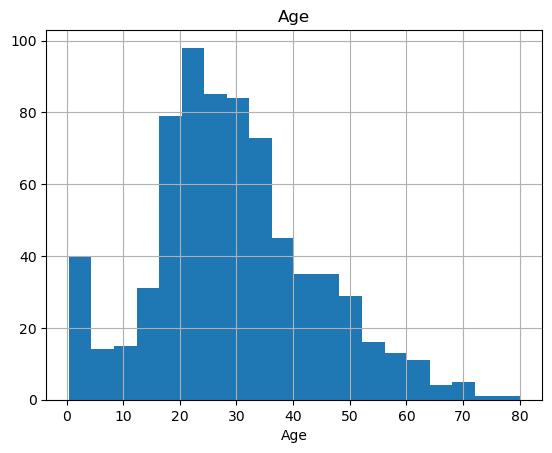

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


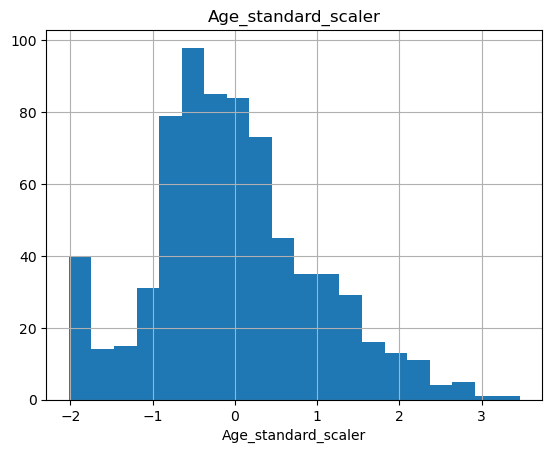

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


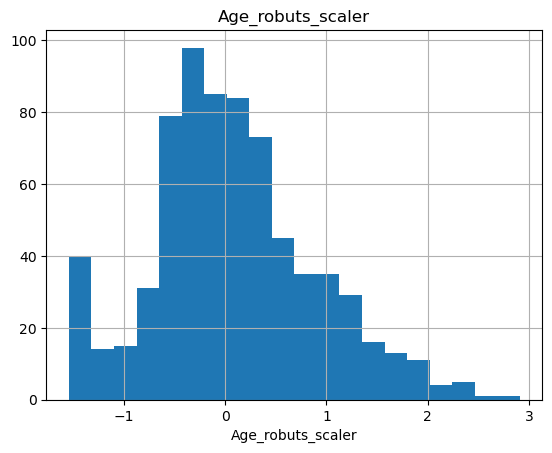

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


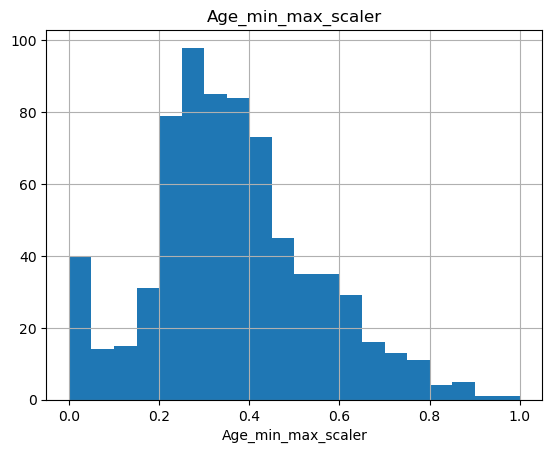

In [69]:
# Numerical Summaries and Histograms for Age Columns

for col in age_cols:
    num_summary(df_titanic, col, plot=True)

# Numeric to Categorical : Converting Numeric Variables to Catheoric Variables (Binning)

In [70]:
# Age Column - Quantile-Based Discretization (qcut)

df_titanic["Age_qcut"] = pd.qcut(df_titanic['Age'], 5)

In [71]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435,"(31.8, 41.0]"
